- [1 : Importer les librairies](#1)
- [5 : Identifier la problématique (classification)](#6)
- [6 : Appliquer des modèles](#7)
- [7 : Trouver le modèle plus pertinent](#8)
- - [7-1 : Train_test_split](#8-1)
- - [7-2 : Boost du modèle](#8-2)
- - [7-3 : GridSearchCV](#8-3)
- - [7-4 : Treshold](#8-4)
- [8 : Analyser le résultat](#9)

## <a id='1'><center><font color="INDIANRED">1) Importer les librairies</font></center></a>

In [369]:
#On import les librairies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics, svm
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score,classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score,precision_recall_curve

from sklearn import tree,preprocessing 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import *
from sklearn.preprocessing import *

import warnings

from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [370]:
#On ignore les messages rouge d'erreur
warnings.filterwarnings('ignore')

In [371]:
# import des fichiers de données dans le df
df_demise = pd.read_csv("data_projet1.csv") # data réfléchit logiquement

## <a id='6'><center><font color="INDIANRED">5) Identifier la problématique (classification)</font></center></a>

In [372]:
df_demise

,Value,Amount,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted,CustomerId_y,duree_pay,jour_diff,SubscriptionId_SubscriptionId_1,...,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_retail,ProductCategory_tv,ProductCategory_utility_bill,InvestorId_InvestorId_1,InvestorId_InvestorId_2,InvestorId_InvestorId_3
0,10000.0,-10000.0,10016.0,1.0,0.0,0.0,17,4.0,26.0,0,...,1,0,0,0,0,0,0,0,0,1
1,10000.0,-10000.0,584.0,1.0,0.0,0.0,17,5.0,25.0,0,...,1,0,0,0,0,0,0,0,0,1
2,10000.0,-10000.0,100.0,1.0,0.0,0.0,17,7.0,23.0,0,...,1,0,0,0,0,0,0,0,0,1
3,10000.0,-10000.0,11100.0,1.0,1.0,0.0,17,15.0,15.0,1,...,1,0,0,0,0,0,0,0,1,0
4,10000.0,-10000.0,10700.0,1.0,1.0,0.0,17,7.0,23.0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,5000.0,-5000.0,5200.0,1.0,1.0,0.0,1,0.0,30.0,0,...,1,0,0,0,0,0,0,1,0,0
1484,2500.0,-2500.0,2850.0,1.0,1.0,0.0,1,21.0,9.0,0,...,1,0,0,0,0,0,0,1,0,0
1485,3500.0,-3500.0,3763.0,1.0,1.0,0.0,1,8.0,22.0,0,...,0,0,0,0,0,1,0,1,0,0
1486,10000.0,-10000.0,10400.0,1.0,1.0,0.0,1,0.0,30.0,1,...,1,0,0,0,0,0,0,0,1,0


On esseye de trouver les bons payeurs et les mauvais payeurs, on se fixe un score de 70%, donc on esseye d'avoir un recall des bons payeurs bien, et une précision des mauvais payeurs bien

## <a id='7'><center><font color="INDIANRED">6) Appliquer des modèles</font></center></a>

In [373]:
X = df_demise.drop("IsDefaulted", axis=1)
y = df_demise["IsDefaulted"]

## <a id='8'><center><font color="INDIANRED">7) Trouver le modèle plus pertinent</font></center></a>

### <a id='8-1'><center><font color="steelblue">7-1) Train_test_split</font></center></a>

On sépare les données d'entrainement et de test à hauteur de 80% d'entrainement et 20 % de test

In [374]:
#df_target1 = df_demise[df_demise["IsDefaulted"] == 1.0]
#df_target1

In [375]:
#df_target0 = df_demise[df_demise["IsDefaulted"] == 0.0]
#df_target0

In [376]:
#X_0 = df_target0.drop("IsDefaulted", axis=1)
#y_0 = df_target0["IsDefaulted"]
#X_1 = df_target1.drop("IsDefaulted", axis=1)
#y_1 = df_target1["IsDefaulted"]

In [377]:
#X_train0, X_test0, y_train0, y_test0 = train_test_split(X_0, y_0, test_size = 0.2, random_state = 0)
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, test_size = 0.2, random_state = 0)

In [378]:
#split = int(target1.shape[0] * 0.8)
#split

In [379]:
#y_train1.value_counts()

In [380]:
#X_train = pd.concat([X_train0, X_train1])
#X_test = pd.concat([X_test0, X_test1])
#y_train = pd.concat([y_train0, y_train1])
#y_test = pd.concat([y_test0, y_test1])

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [382]:
#ros = RandomOverSampler()
#X_train, y_train = ros.fit_sample(X_train, y_train)
#print('Resampled dataset shape %s' % Counter(X_train))

#rus = RandomUnderSampler()
#X_train, y_train = rus.fit_resample(X_train, y_train)
#print('Resampled dataset shape %s' % Counter(X_train))

### <a id='8-2'><center><font color="steelblue">7-2) Boost du modèle</font></center></a>

In [383]:
def evaluate(model):
    #On entraine le modèle
    model.fit(X_train,y_train)
    #On fait les prédictions
    pred = model.predict(X_test)
    
    #on affiche la matrice de confusion
    print(confusion_matrix(y_test,pred))
    #On affiche toute les valeurs de metrics pour la classification
    print(classification_report(y_test,pred))
    
    #Learning curve avec cross validation de 4
    N, train_score,val_score = learning_curve(model, X_train, y_train, cv = 4, train_sizes = np.linspace(0.1,1,10), scoring = 'accuracy')
    
    #on l'affiche dans un plot
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1),label='train_score')
    plt.plot(N, val_score.mean(axis=1),label='val_score')
    plt.title(f'{name}')
    plt.legend()
    plt.show()
    
    print("\n____________________________________________________________________________________\n")

In [384]:
#On créer une pipeline, avec 2 polynomial, un test anova sur le Kbest et avec une séléction de 4 features
#mettre dans l'estimateur dans un seul processe, make_pipeline mettre les séquence que l'on  va appliquer
Pipe = make_pipeline(PolynomialFeatures(2,include_bias=False),SelectKBest(f_classif,k=4))

In [385]:
#On définit les modèles
random_forest_classifier = make_pipeline(Pipe,StandardScaler(), RandomForestClassifier(random_state=0))
adaboost = make_pipeline(Pipe, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(Pipe,StandardScaler(),SVC(random_state=0))
KNN = make_pipeline(Pipe,StandardScaler(),KNeighborsClassifier())
regressionlogistique = make_pipeline(Pipe, LogisticRegression(solver = 'liblinear'))
dtree = make_pipeline(Pipe, tree.DecisionTreeClassifier(criterion = 'gini', random_state = 0))
XGboostcla = make_pipeline(Pipe,xgb.XGBClassifier())

In [386]:
models_pipe = { 'random_forest_classifier' : random_forest_classifier,
               'adaboost' : adaboost,
               'SVM' : SVM,
               'KNN' : KNN,
               'regressionlogistique' : regressionlogistique,
               'dtree' : dtree,
               'XGboostcla' : XGboostcla}

random_forest_classifier
[[249  13]
 [  7  29]]
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       262
         1.0       0.69      0.81      0.74        36

    accuracy                           0.93       298
   macro avg       0.83      0.88      0.85       298
weighted avg       0.94      0.93      0.94       298



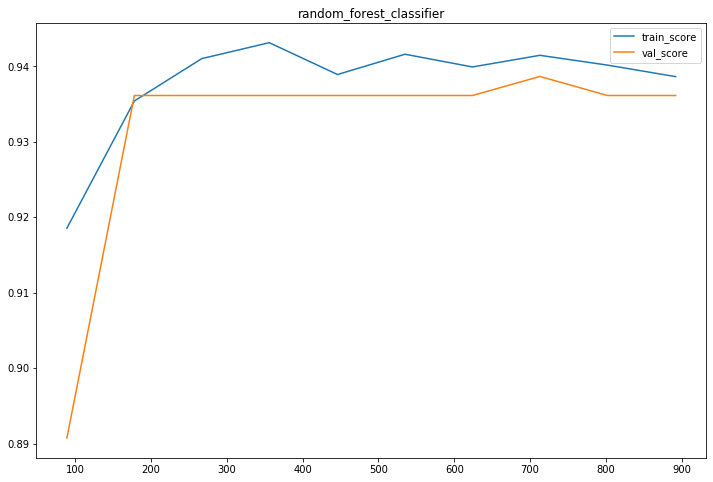


____________________________________________________________________________________

adaboost
[[249  13]
 [  7  29]]
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       262
         1.0       0.69      0.81      0.74        36

    accuracy                           0.93       298
   macro avg       0.83      0.88      0.85       298
weighted avg       0.94      0.93      0.94       298



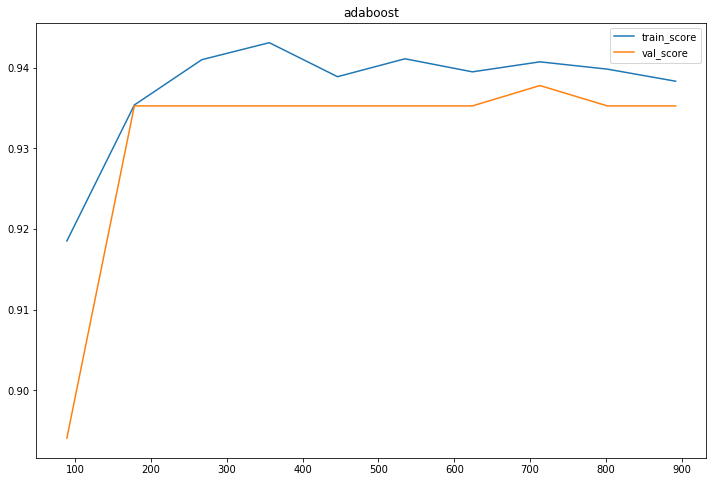


____________________________________________________________________________________

SVM
[[249  13]
 [  7  29]]
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       262
         1.0       0.69      0.81      0.74        36

    accuracy                           0.93       298
   macro avg       0.83      0.88      0.85       298
weighted avg       0.94      0.93      0.94       298



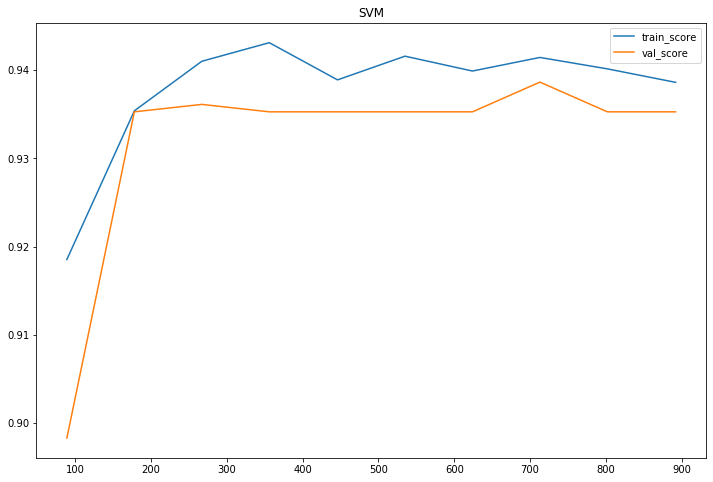


____________________________________________________________________________________

KNN
[[249  13]
 [  7  29]]
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       262
         1.0       0.69      0.81      0.74        36

    accuracy                           0.93       298
   macro avg       0.83      0.88      0.85       298
weighted avg       0.94      0.93      0.94       298



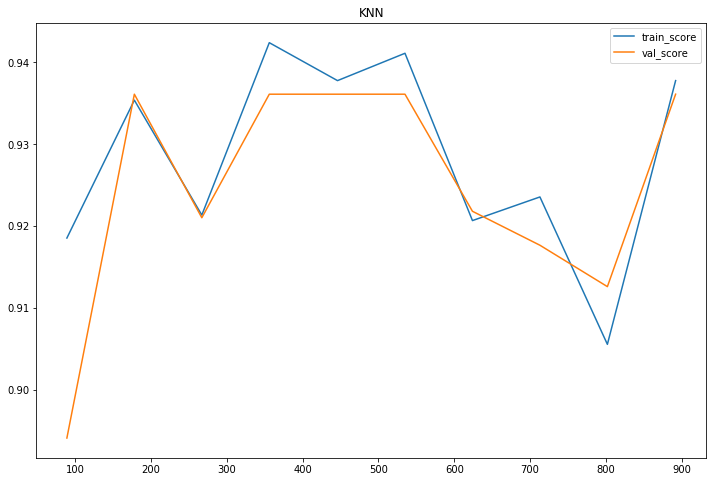


____________________________________________________________________________________

regressionlogistique
[[249  13]
 [  7  29]]
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       262
         1.0       0.69      0.81      0.74        36

    accuracy                           0.93       298
   macro avg       0.83      0.88      0.85       298
weighted avg       0.94      0.93      0.94       298



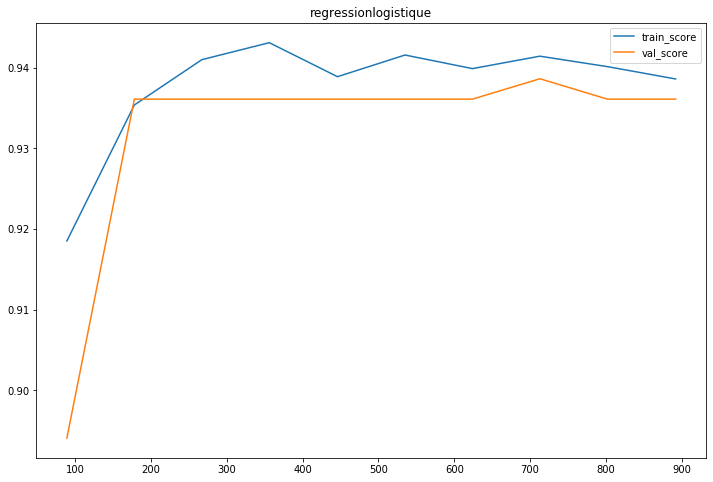


____________________________________________________________________________________

dtree
[[249  13]
 [  7  29]]
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       262
         1.0       0.69      0.81      0.74        36

    accuracy                           0.93       298
   macro avg       0.83      0.88      0.85       298
weighted avg       0.94      0.93      0.94       298



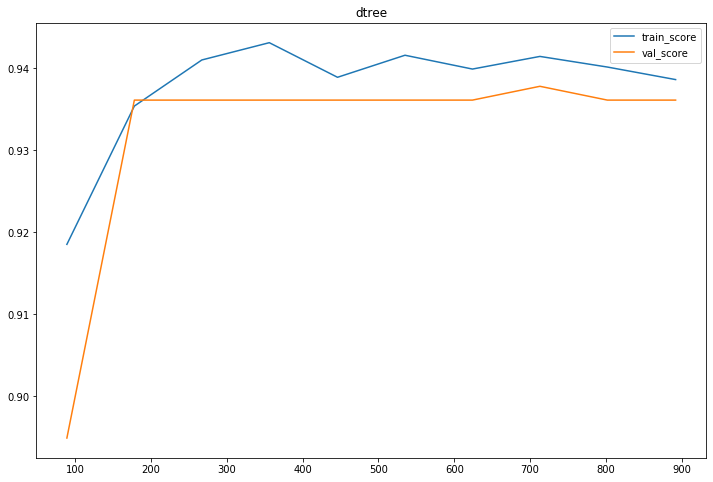


____________________________________________________________________________________

XGboostcla
[[249  13]
 [  7  29]]
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       262
         1.0       0.69      0.81      0.74        36

    accuracy                           0.93       298
   macro avg       0.83      0.88      0.85       298
weighted avg       0.94      0.93      0.94       298



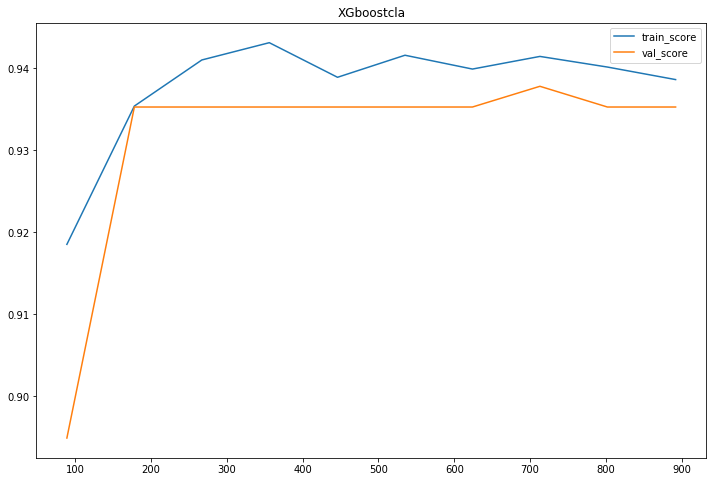


____________________________________________________________________________________



In [387]:
#boucle pour faire les modèles
for name,model in models_pipe.items() : 
    print(name)
    evaluate(model)


### <a id='8-3'><center><font color="steelblue">7-3)Gridsearch</font></center></a>

In [388]:
KNN.get_params()

{'memory': None,
 'steps': [('pipeline',
   Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                   ('selectkbest', SelectKBest(k=4))])),
  ('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'pipeline': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                 ('selectkbest', SelectKBest(k=4))]),
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'pipeline__memory': None,
 'pipeline__steps': [('polynomialfeatures',
   PolynomialFeatures(include_bias=False)),
  ('selectkbest', SelectKBest(k=4))],
 'pipeline__verbose': False,
 'pipeline__polynomialfeatures': PolynomialFeatures(include_bias=False),
 'pipeline__selectkbest': SelectKBest(k=4),
 'pipeline__polynomialfeatures__degree': 2,
 'pipeline__polynomialfeatures__include_bias': False,
 'pipeline__polynomialfeatures__interaction_only': False,
 'pipeline__polynom

On va esseyé de booster le modèle SVM

In [389]:
#On affiche les paramètres du SVM
SVM.get_params()

{'memory': None,
 'steps': [('pipeline',
   Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                   ('selectkbest', SelectKBest(k=4))])),
  ('standardscaler', StandardScaler()),
  ('svc', SVC(random_state=0))],
 'verbose': False,
 'pipeline': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                 ('selectkbest', SelectKBest(k=4))]),
 'standardscaler': StandardScaler(),
 'svc': SVC(random_state=0),
 'pipeline__memory': None,
 'pipeline__steps': [('polynomialfeatures',
   PolynomialFeatures(include_bias=False)),
  ('selectkbest', SelectKBest(k=4))],
 'pipeline__verbose': False,
 'pipeline__polynomialfeatures': PolynomialFeatures(include_bias=False),
 'pipeline__selectkbest': SelectKBest(k=4),
 'pipeline__polynomialfeatures__degree': 2,
 'pipeline__polynomialfeatures__include_bias': False,
 'pipeline__polynomialfeatures__interaction_only': False,
 'pipeline__polynomialfeatures__order': 'C',
 'pipeline__se

In [390]:
#On change le gamma, le C, le nombre de polymonialfeature et le selectKbest
params = {'svc__gamma':[1e-3, 1e-4],
          'svc__C':[1.0,10.0,100.0,1000.0],
          'pipeline__polynomialfeatures__degree':[2,3,4],
          'pipeline__selectkbest__k':range(2,17)}

In [391]:
paramsKNN = {'kneighborsclassifier__n_neighbors':[2, 3, 4,5,6,7,8,9],
          'kneighborsclassifier__p':[1,2],
          'pipeline__polynomialfeatures__degree':[2,3,4],
          'pipeline__selectkbest__k':range(2,17)}

On enleve la recherche de différent kernel, l'ordinateur tourne trop longtemps

In [392]:
 #        'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],

Le machine tourne beaucoup avec gridsearch, du coup on va faire un randomizedsearch

In [393]:
#grid = GridSearchCV(SVM, params,scoring='accuracy',cv=4)
grid = RandomizedSearchCV(SVM, params,scoring='accuracy',cv=4,n_iter=10)
grid.fit(X_train,y_train)
print(grid.best_params_)

svm_pred = grid.predict(X_test)

print(classification_report(y_test,svm_pred))

{'svc__gamma': 0.0001, 'svc__C': 100.0, 'pipeline__selectkbest__k': 12, 'pipeline__polynomialfeatures__degree': 4}
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       262
         1.0       0.69      0.81      0.74        36

    accuracy                           0.93       298
   macro avg       0.83      0.88      0.85       298
weighted avg       0.94      0.93      0.94       298



### <a id='8-4'><center><font color="steelblue">7-4)Treshold</font></center></a>

In [394]:
precision,recall,threshold = precision_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))

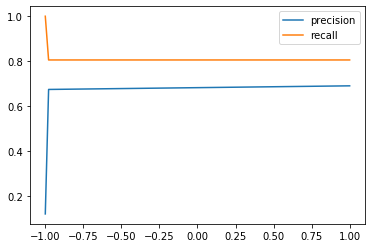

In [395]:
plt.plot(threshold,precision[:-1], label="precision")
plt.plot(threshold,recall[:-1], label="recall")
plt.legend()

## <a id='9'><center><font color="INDIANRED">8) Analyser le résultat</font></center></a>

In [396]:
def final(model,X,treshold=0):
    return model.decision_function(X) > treshold

In [397]:
f_pred = final(grid.best_estimator_,X_test,treshold=0.8)

In [398]:
f1_score(y_test,f_pred)

0.7435897435897436

In [399]:
recall_score(y_test,f_pred)

0.8055555555555556

In [400]:
print(classification_report(y_test,f_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       262
         1.0       0.69      0.81      0.74        36

    accuracy                           0.93       298
   macro avg       0.83      0.88      0.85       298
weighted avg       0.94      0.93      0.94       298



On sacrifie un peu de precision des non solvables et de F1 score des solvables pour monter le recall des non solvables

In [401]:
SVM.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'standardscaler', 'svc', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__polynomialfeatures', 'pipeline__selectkbest', 'pipeline__polynomialfeatures__degree', 'pipeline__polynomialfeatures__include_bias', 'pipeline__polynomialfeatures__interaction_only', 'pipeline__polynomialfeatures__order', 'pipeline__selectkbest__k', 'pipeline__selectkbest__score_func', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])